In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Set2"))

import CONSTANTS

import utils.stock_data_proc as proc

In [8]:
raw = proc.get_local_dataset("AAPL")
raw = proc.gen_classification_label(raw)
raw.dropna(inplace=True)

In [9]:
selected = np.logical_and(
    raw.index >= "2018-01-01",
    raw.index <= "2018-12-31"
)

In [10]:
df = raw[selected]

In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,bin_label,ter_label
Date,,,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.199890,25555900.0,1.0,1.0
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.170776,29517900.0,0.0,-1.0
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.947266,22434600.0,1.0,1.0
2018-01-05,173.440002,175.369995,173.050003,175.000000,169.859406,23660000.0,1.0,1.0
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.228500,20567800.0,0.0,-1.0


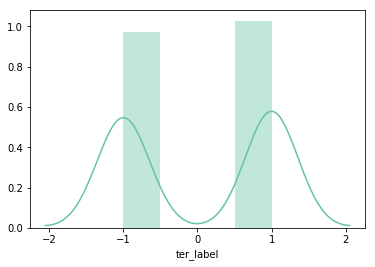

In [14]:
sns.distplot(df.ter_label)
plt.show()

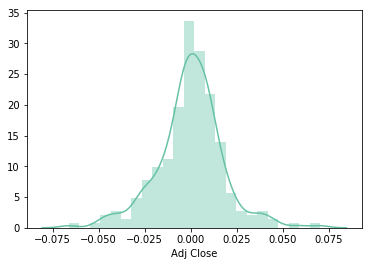

In [15]:
sns.distplot(df["Adj Close"].pct_change().dropna())
plt.show()

In [21]:
t25, t50, t75 = (np.percentile(df["Adj Close"].pct_change().dropna(), x) for x in [25, 50, 75])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


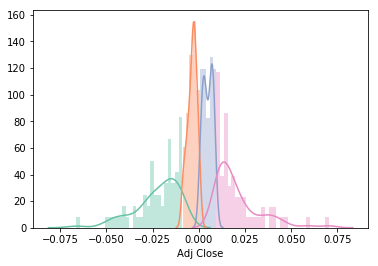

In [46]:
pct = df["Adj Close"].pct_change().dropna()
sns.distplot(pct[pct <= t25], kde=True, bins=30)
sns.distplot(pct[np.logical_and(pct > t25, pct <= t50)], kde=True, bins=5)
sns.distplot(pct[np.logical_and(pct > t50, pct <= t75)], kde=True, bins=5)
sns.distplot(pct[pct > t75], kde=True, bins=30)
plt.show()

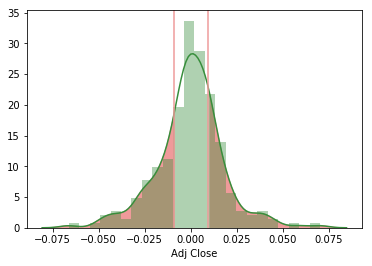

In [47]:
ax = sns.distplot(pct, hist=True,color='#388E3C')
kde_x, kde_y = ax.lines[0].get_data()
p1 = plt.axvline(x=t25,color='#EF9A9A')
p2 = plt.axvline(x=t75,color='#EF9A9A')
ax.fill_between(kde_x, kde_y, where=(kde_x<t25) | (kde_x>t75) , 
                interpolate=True, color='#EF9A9A')